### Import Library

In [55]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
from pykrx import stock

### 종목별 최근 3년간 평균 Quality Score

In [49]:
# 폴더 경로 설정
folder_path = '../data/stock_quality_data/'
# 폴더 내의 파일 목록 가져오기
file_list = os.listdir(folder_path)
# 각 파일을 불러와서 데이터프레임으로 저장
quality_df_list = []
quality_stock_df = []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, encoding='euc-kr', index_col=0)
    df = df[['Quality', 'stock_name']]
    quality_mean = df['Quality'][:-3].mean()
    df.loc[len(df)] = [quality_mean, file_name[:-24]]
    df = df[-1:].rename(columns={'Quality': 'Quality_Recent_Mean'}).set_index('stock_name')
    pd.options.display.float_format = '{:.3f}'.format  # 출력 형식 설정
    quality_df_list.append(df)

# 모든 데이터프레임을 연결하여 하나의 데이터프레임으로 만듦
quality_stock_df = pd.concat(quality_df_list)
quality_stock_df.sort_values(by='Quality_Recent_Mean',ascending=False)[:10]

,Quality_Recent_Mean
stock_name,
효성,1.328
GKL,0.850
현대해상,0.819
DB손해보험,0.674
강원랜드,0.651
LS,0.609
한국타이어앤테크놀로지,0.573
오뚜기,0.564
한샘,0.556


### 상위 종목의 Quality Score 추이

In [19]:
# 폴더 경로 설정
folder_path = '../data/stock_quality_data/'
# 폴더 내의 파일 목록 가져오기
file_list = os.listdir(folder_path)
# 각 파일을 불러와서 데이터프레임으로 저장
quality_top = {}
quality_stock_df = []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, encoding='euc-kr', index_col=0)
    df = df[['Quality', 'stock_name']]
    quality_top[file_name[:-24]] = df

C:\Users\SAMSUNG\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


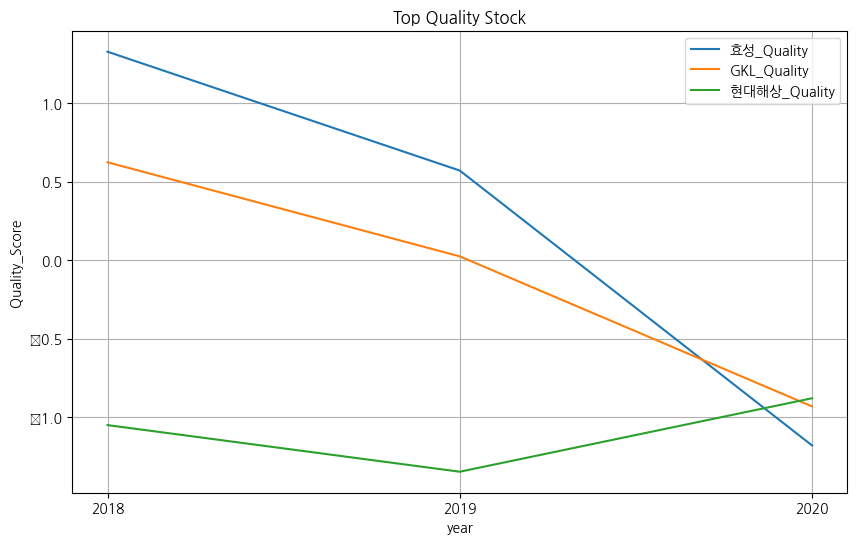

In [48]:
# Quality Score 상위 top3 종목
효성 = quality_top['효성'][quality_top['효성'].index.isin([2018, 2019, 2020])].rename(columns = {'Quality':'효성_Quality'})['효성_Quality']
GKL = quality_top['GKL'][quality_top['GKL'].index.isin([2018, 2019, 2020])].rename(columns = {'Quality':'GKL_Quality'})['GKL_Quality']
현대해상 = quality_top['현대해상'][quality_top['현대해상'].index.isin([2018, 2019, 2020])].rename(columns = {'Quality':'현대해상_Quality'})['현대해상_Quality']
top_quality = pd.concat([효성,GKL,현대해상],axis=1)
top_quality.index = top_quality.index.astype('str')

plt.figure(figsize=(10,6))
plt.plot(top_quality.index, top_quality['효성_Quality'], label='효성_Quality')
plt.plot(top_quality.index, top_quality['GKL_Quality'], label='GKL_Quality')
plt.plot(top_quality.index, top_quality['현대해상_Quality'], label='현대해상_Quality')

plt.title('Top Quality Stock')
plt.xlabel('year')
plt.ylabel('Quality_Score')
plt.legend()

plt.grid(True)
plt.show()

### Quality Score와 주가의 상관관계

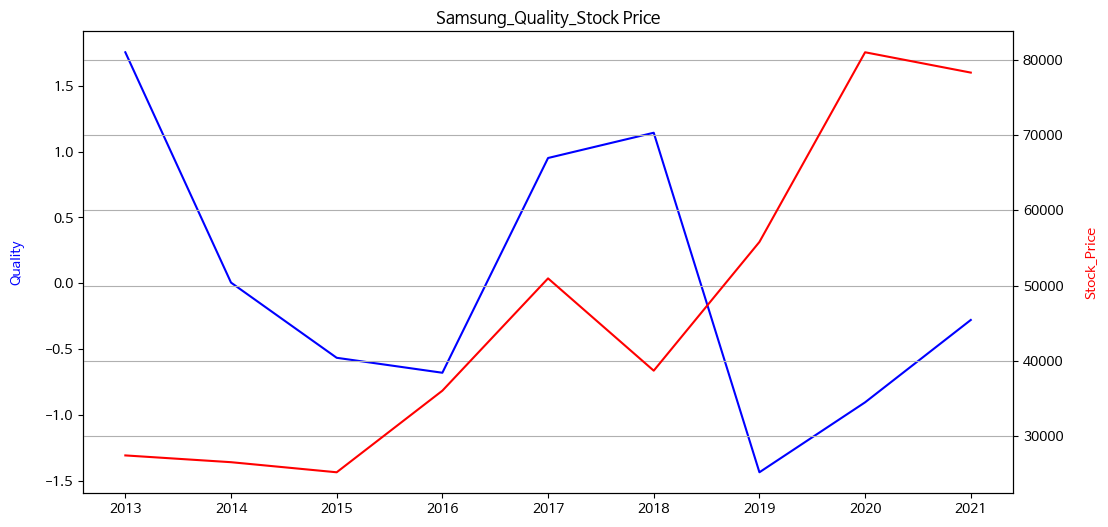

<Figure size 1000x600 with 0 Axes>

In [115]:
index_name = [2013,2014,2015,2016,2017,2018,2019,2020,2021]
price = stock.get_market_ohlcv('20130101','20220101','005930','y')['종가']
price.index = index_name
price = pd.DataFrame(price)
quality_price = pd.concat([quality_top['삼성전자'],price],axis=1)
quality_price.index = quality_price.index.astype('str')
quality_price = quality_price.rename(columns = {'종가':'Stock_Price'})

# 첫 번째 y축에 Quality 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(quality_price.index, quality_price['Quality'], label='Quality', color='blue')
plt.ylabel('Quality', labelpad=15,color = 'blue')

# 두 번째 y축 생성
plt.twinx()
# 두 번째 y축에 Stock_Price 그래프 그리기
plt.plot(quality_price.index, quality_price['Stock_Price'], label='Stock_Price', color='red')
plt.ylabel('Stock_Price', labelpad=15,color = 'red')

plt.title('Samsung_Quality_Stock Price')
plt.xlabel('Year')

plt.grid(True)
plt.show()

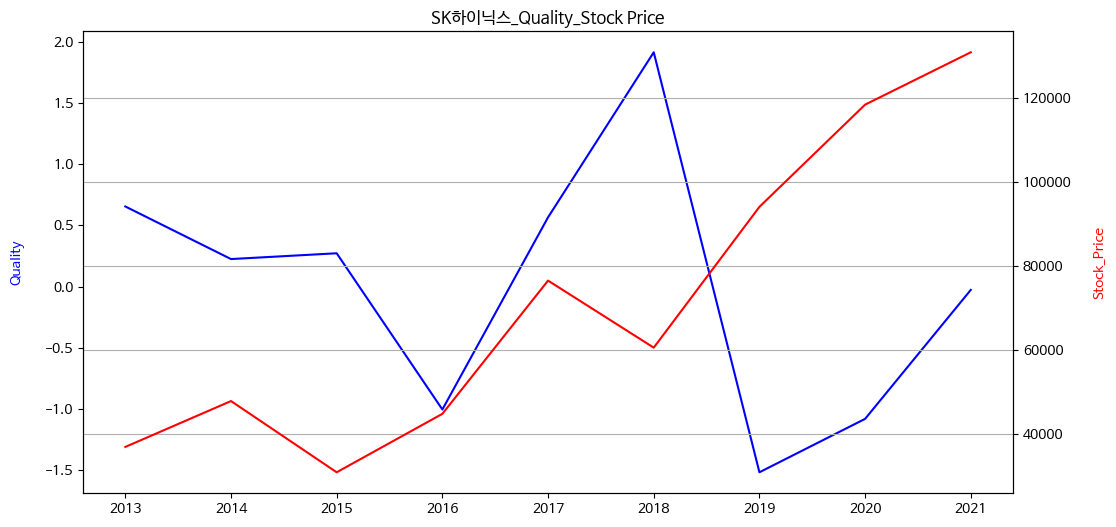

In [112]:
index_name = [2013,2014,2015,2016,2017,2018,2019,2020,2021]
price = stock.get_market_ohlcv('20130101','20220101','000660','y')['종가']
price.index = index_name
price = pd.DataFrame(price)
quality_price = pd.concat([quality_top['SK하이닉스'],price],axis=1)
quality_price.index = quality_price.index.astype('str')
quality_price = quality_price.rename(columns = {'종가':'Stock_Price'})

# 첫 번째 y축에 Quality 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(quality_price.index, quality_price['Quality'], label='Quality', color='blue')
plt.ylabel('Quality',labelpad=15,color = 'blue')

# 두 번째 y축 생성
plt.twinx()
# 두 번째 y축에 Stock_Price 그래프 그리기
plt.plot(quality_price.index, quality_price['Stock_Price'], label='Stock_Price', color='red')
plt.ylabel('Stock_Price', labelpad=15,color = 'red')

plt.title('SK하이닉스_Quality_Stock Price')
plt.xlabel('Year')

plt.grid(True)
plt.show()